centre（Kelvin）:
[[381. 386. 395. 400. 404.]
 [381. 383. 390. 391. 400.]
 [386. 391. 386. 389. 380.]
 [376. 376. 379. 379. 377.]
 [379. 380. 381. 378. 379.]]


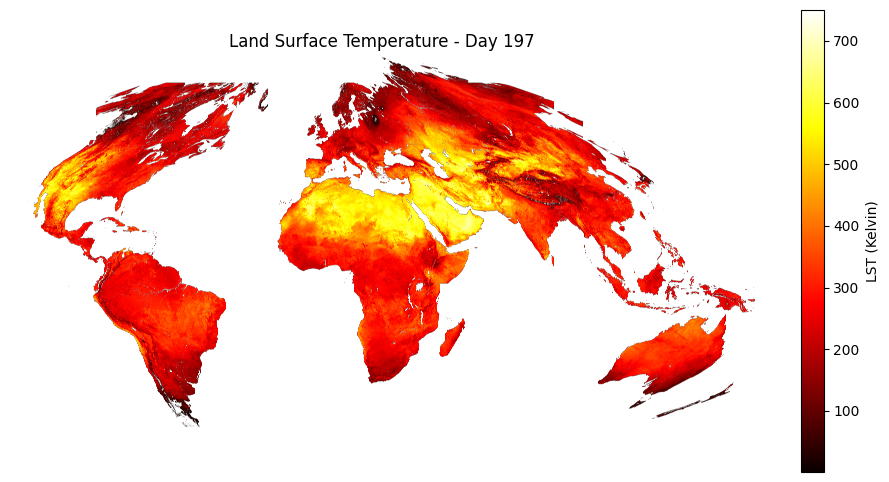

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

tif_path = 'data/raw/gf_Day2020_197.tif'

with rasterio.open(tif_path) as src:
    temp_data = src.read(1)
    profile = src.profile
    bounds = src.bounds  

temp_data = temp_data.astype(np.float32)
temp_data[temp_data <= 0] = np.nan

h, w = temp_data.shape
print("centre（Kelvin）:")
print(temp_data[h//2 : h//2+5, w//2 : w//2+5])

plt.figure(figsize=(12, 6))
plt.imshow(temp_data, cmap='hot')
plt.colorbar(label='LST (Kelvin)')
plt.title('Land Surface Temperature - Day 197')
plt.axis('off')
plt.show()


In [2]:
print("edge (W,E,S,N):", bounds.left, bounds.right, bounds.bottom, bounds.top)


edge (W,E,S,N): -12231455.717432 16679257.796484001 -5559752.598833 8895604.15813799


In [3]:
from pyproj import Transformer

transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)
dc_west, dc_south = transformer.transform(-77.1, 38.8)
dc_east, dc_north = transformer.transform(-76.9, 39.0)

print("DC (Web Mercator ):")
print("W,E:", dc_west, dc_east)
print("S,N:", dc_south, dc_north)


DC (Web Mercator ):
W,E: -8582732.740161393 -8560468.842002738
S,N: 4693063.644295792 4721671.572580108


In [4]:

if bounds.left < dc_west and bounds.right > dc_east and bounds.bottom < dc_south and bounds.top > dc_north:
    print("✅  DC ")
else:
    print("⚠️ not DC ")


✅  DC 
